# Check CUDA configs


In [1]:
import torch
import ultralytics

# %export CUDA_VISIBLE_DEVICES=""

# torch.cuda.is_available()
# torch.cuda.set_device(0)

In [2]:
# check cuda configurations
print(torch.version.cuda)
# torch.cpu()
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))

12.1
True
0
NVIDIA GeForce RTX 4070 Laptop GPU


# MODEL TRAINING


In [1]:
from ultralytics import YOLO
import os

In [2]:
# model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)
model = YOLO("yolov8n.pt")

data = os.getcwd() + "/datasets/EE297_Project.v4i.yolov8/data.yaml"
epochs = 25
imgsz = 640  # image size
batch = 16  # batch size
device = 0  # use GPU

results = model.train(
    data=data,
    epochs=epochs,
    imgsz=imgsz,
    batch=16,
    device=device,
    workers=1,
)

New https://pypi.org/project/ultralytics/8.0.203 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.175  Python-3.11.5 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=d:\Programming\workspace\plastic-detection/datasets/EE297_Project.v4i.yolov8/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=1, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_str

# MODEL TESTING


In [1]:
import cv2
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [2]:
model_path = "runs/detect/train3/weights/best.pt"
# trained_model = YOLO("yolov8n.yaml").load(model_path)
trained_model = YOLO(model_path)
print(trained_model)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

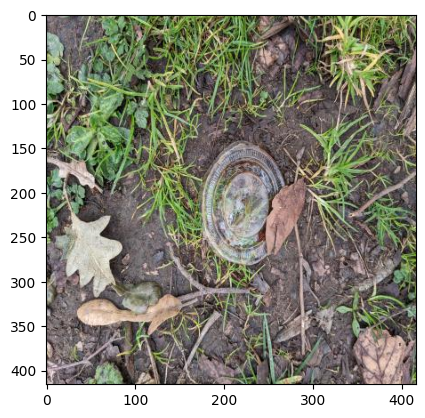


0: 640x640 1 Plastic, 87.4ms
Speed: 30.3ms preprocess, 87.4ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


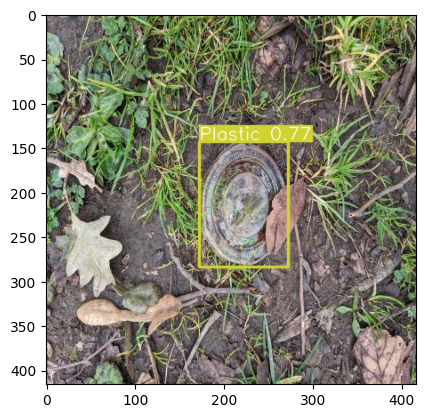

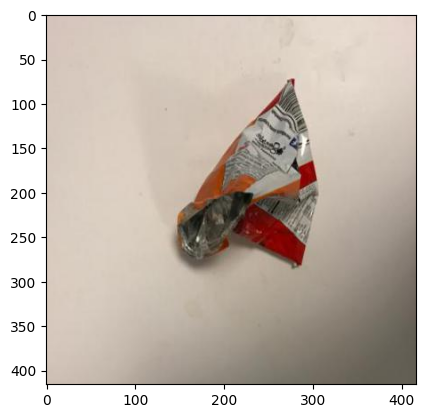


0: 640x640 1 Metal, 34.4ms
Speed: 7.2ms preprocess, 34.4ms inference, 17.4ms postprocess per image at shape (1, 3, 640, 640)


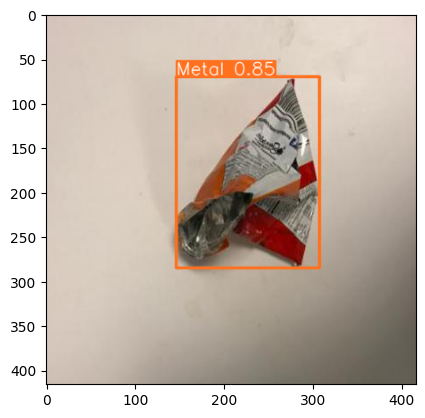

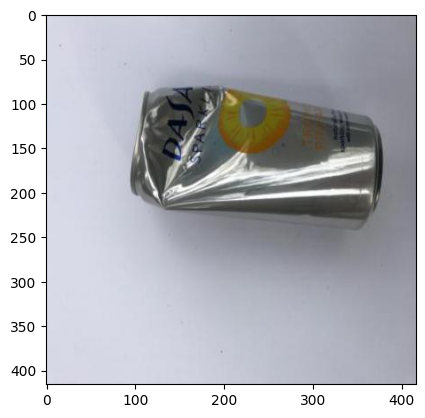


0: 640x640 1 Metal, 5.5ms
Speed: 3.0ms preprocess, 5.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


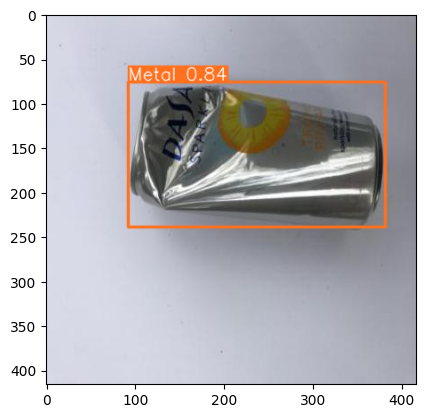

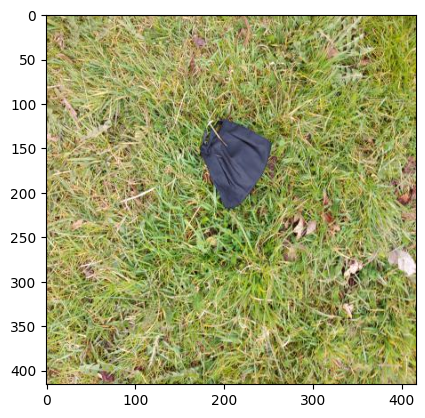


0: 640x640 1 Plastic, 4.0ms
Speed: 3.0ms preprocess, 4.0ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)


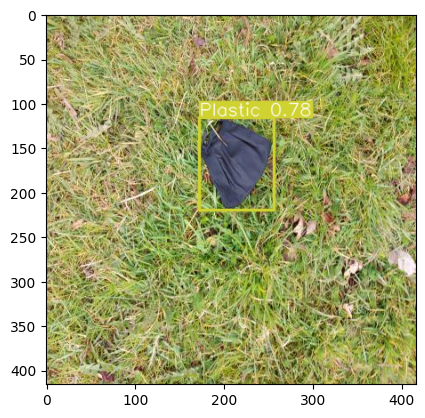

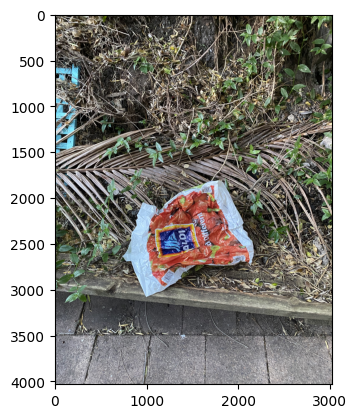


0: 640x480 1 Plastic, 89.7ms
Speed: 1.0ms preprocess, 89.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


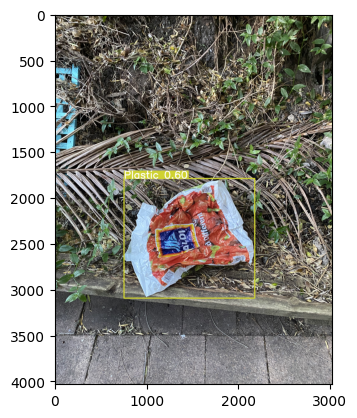

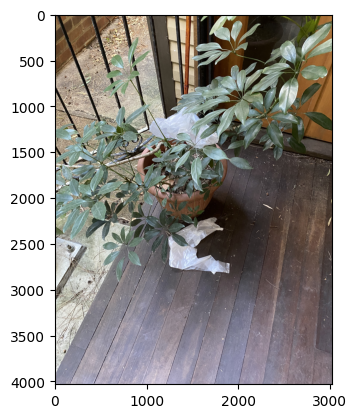


0: 640x480 1 Plastic, 8.1ms
Speed: 2.6ms preprocess, 8.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 480)


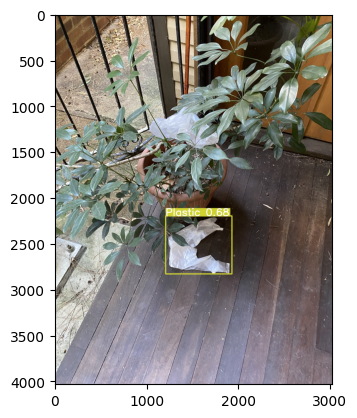

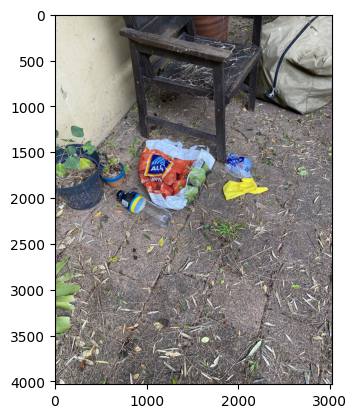


0: 640x480 3 Plastics, 34.7ms
Speed: 12.0ms preprocess, 34.7ms inference, 29.1ms postprocess per image at shape (1, 3, 640, 480)


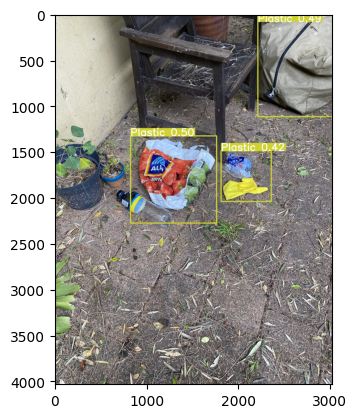

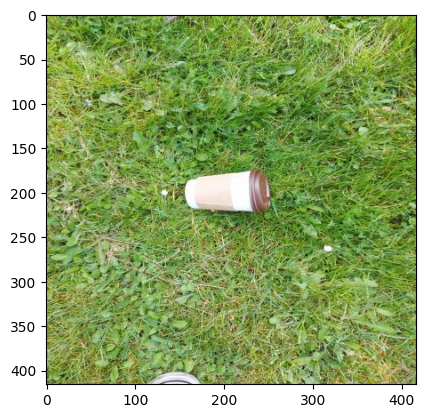


0: 640x640 1 Paper, 1 Plastic, 6.5ms
Speed: 4.2ms preprocess, 6.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


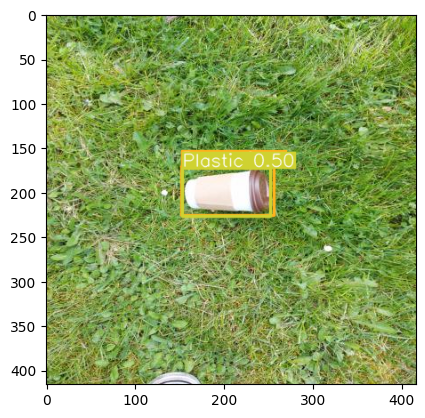

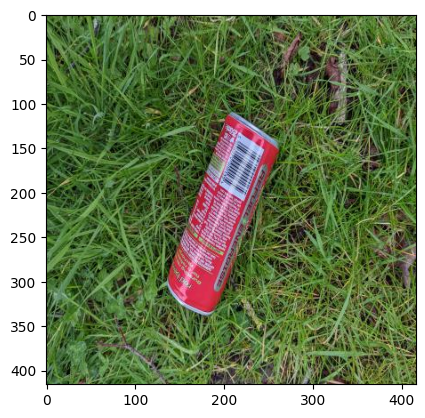


0: 640x640 1 Plastic, 9.0ms
Speed: 3.1ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


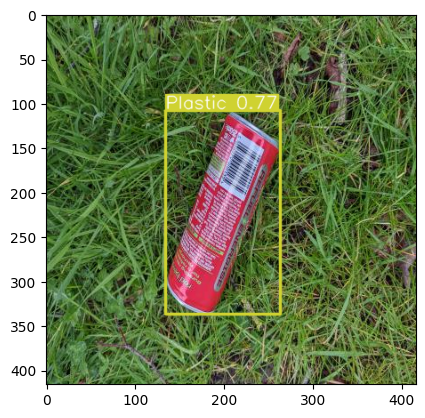

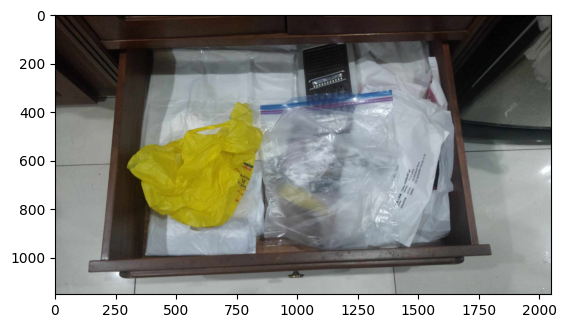


0: 384x640 1 Plastic, 105.3ms
Speed: 2.0ms preprocess, 105.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


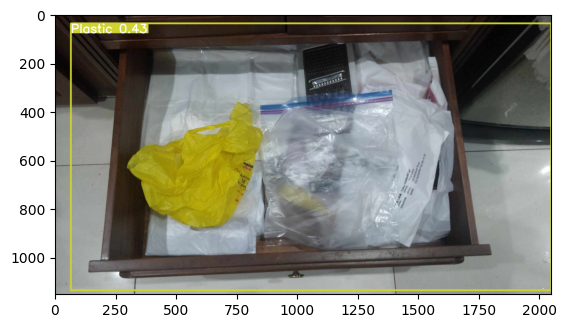

In [5]:
test_imgs = [
    "/datasets/EE297_Project.v4i.yolov8/test/images/PXL_20220330_091951914_jpg.rf.2be1c42071953a90ce2781c2d0d18d8c.jpg",
    "/datasets/EE297_Project.v4i.yolov8/test/images/trash83_jpg.rf.aa417b0b095f4babf254cda7c56710d7.JPG",
    "/datasets/EE297_Project.v4i.yolov8/test/images/metal242_jpg.rf.9e181d3e1d9b561a79e4fd0a8d747a2e.jpg",
    "/datasets/EE297_Project.v4i.yolov8/test/images/20220406_110922_jpg.rf.e08d550fbc12079e7723725ebc7223ce.jpg",
    "/datasets/classification_dataset/images/IMG_0961.jpeg",
    "/datasets/classification_dataset/images/IMG_0975.jpeg",
    "/datasets/classification_dataset/images/IMG_1414.jpeg",
    "/datasets/EE297_Project.v4i.yolov8/test/images/20220406_111424_jpg.rf.412e398d3763d5c122b86b0d3f07e505.jpg",
    "/datasets/EE297_Project.v4i.yolov8/test/images/PXL_20220330_090752236_jpg.rf.1191ca3a67a9f20d7629428a0cc4b43e.jpg",
    # test
    "/394251192_817995040122785_6371357791676965634_n.jpg",
]

for img_path in test_imgs:
    img = cv2.imread(os.getcwd() + img_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

    results = trained_model.predict(img)
    plt.imshow(cv2.cvtColor(results[0].plot(), cv2.COLOR_BGR2RGB))
    plt.show()